In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import Pool, CatBoostRegressor
from gmdhpy import gmdh 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [10]:
data = pd.read_csv('insurance.csv', sep=",")

<h3>Анализ данных</h3>

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
data.corr().charges

age         0.317378
sex         0.098134
bmi         0.210051
children    0.069593
smoker      0.798537
region      0.001551
charges     1.000000
Name: charges, dtype: float64

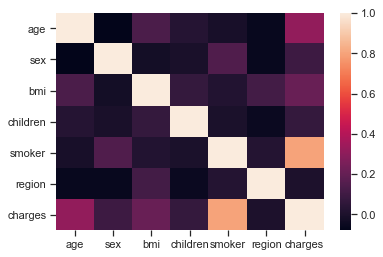

In [15]:
sns.heatmap(data.corr())

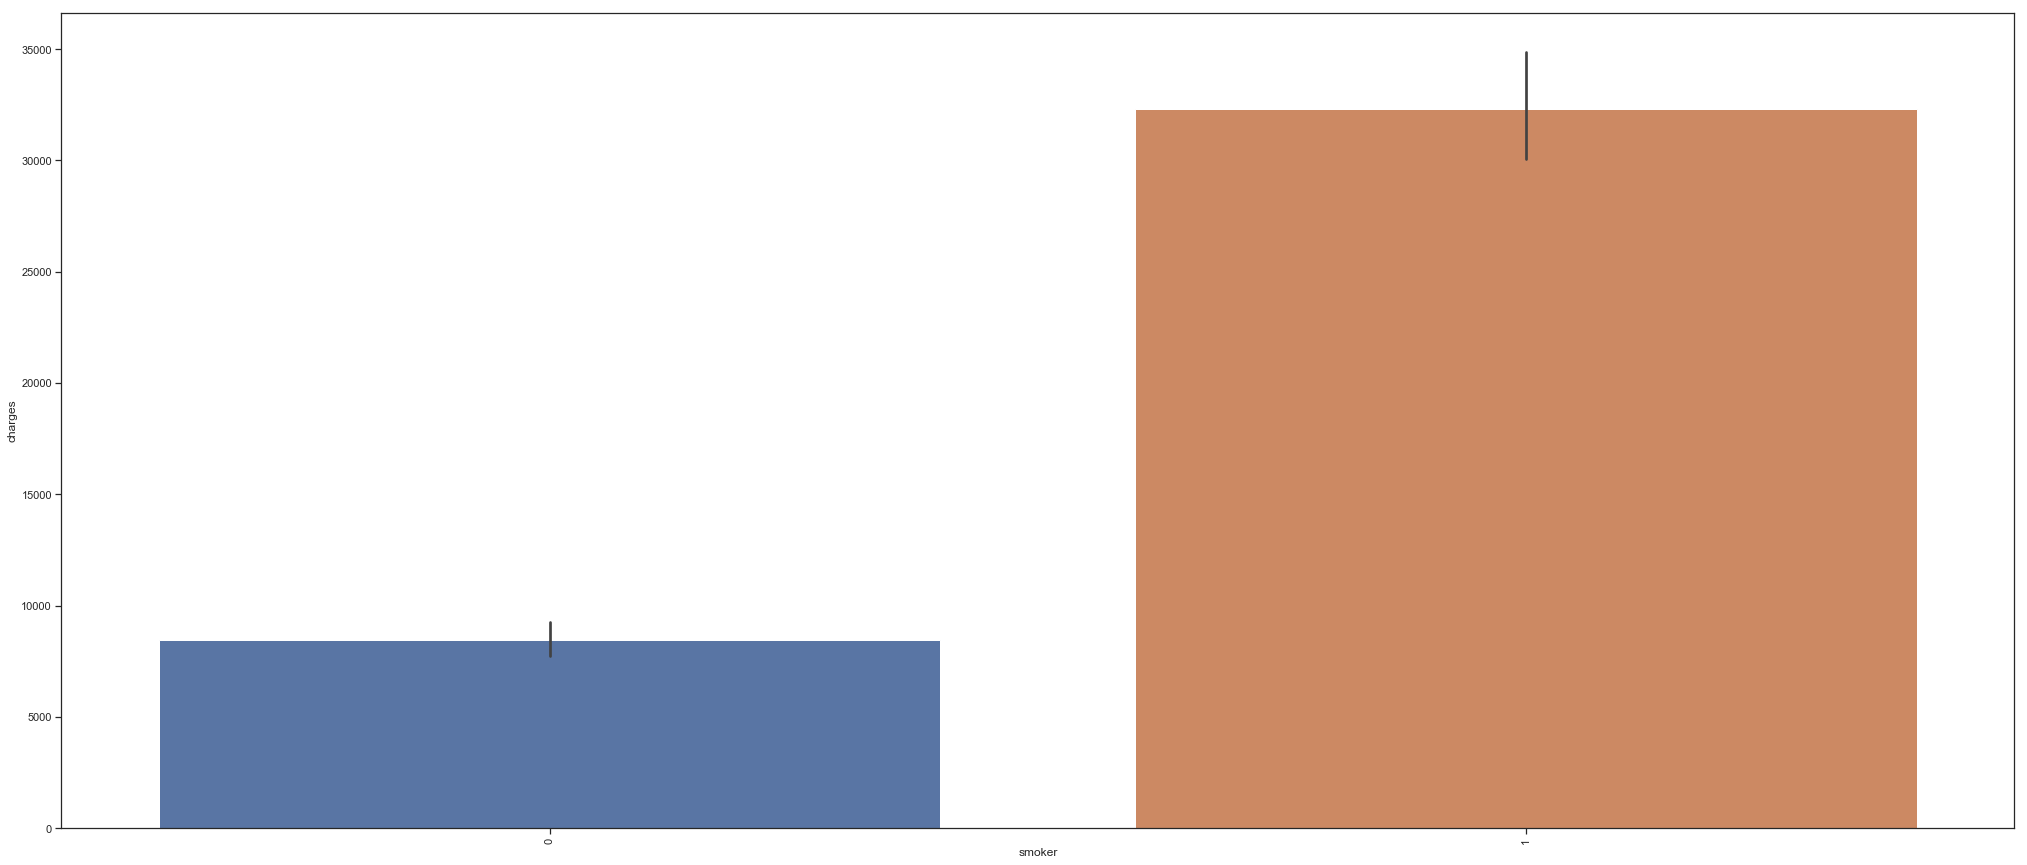

In [16]:
plt.figure(figsize=(35,15))
sns.barplot(x='smoker',y='charges',data=data)
plt.xticks(rotation='vertical')
plt.show()

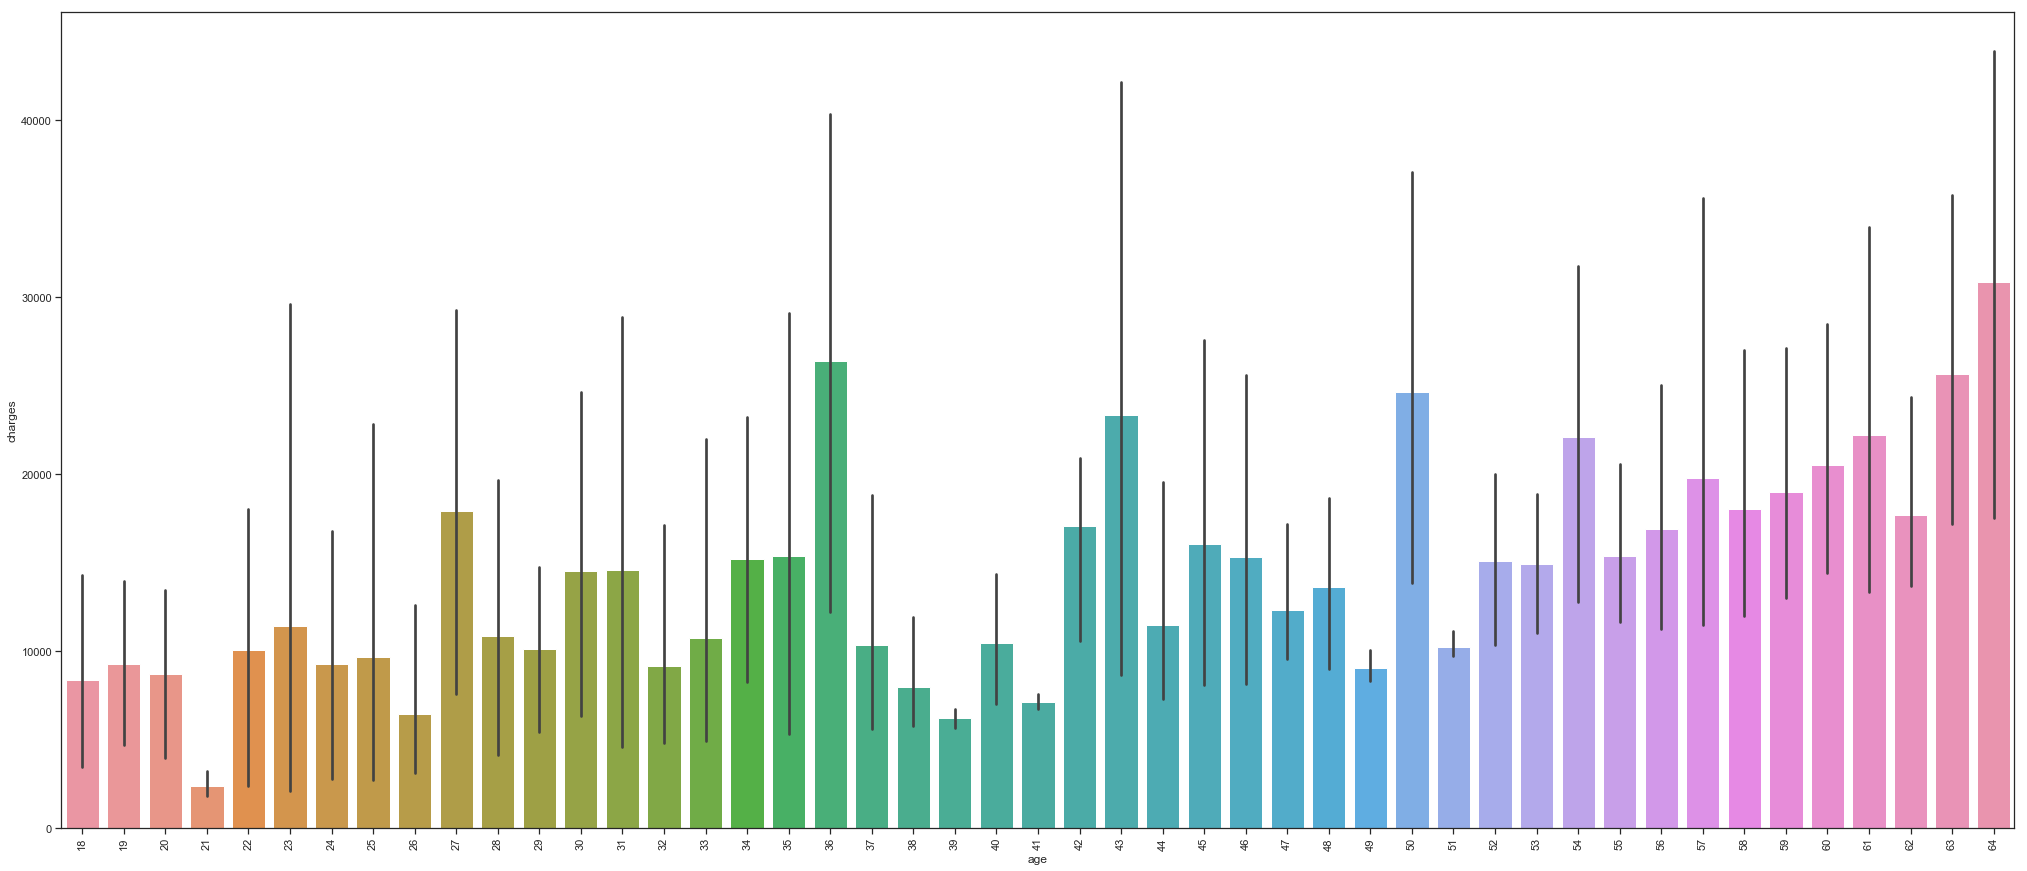

In [17]:
plt.figure(figsize=(35,15))
sns.barplot(x='age',y='charges',data=data)
plt.xticks(rotation='vertical')
plt.show()

<h3>Сформируем обучающую и тестовую выборку</h3>

In [21]:
top = bottom = int(0.05 * data.charges.shape[0])
data.sort_values(by=['charges'],ascending=False, inplace=True)

DataParam = data[top:-bottom].drop('charges', axis=1)
DataAnsw = data[top:-bottom].charges
TrainX, TestX, TrainY, TestY = train_test_split(DataParam, DataAnsw, test_size=0.33, random_state=42)

<h3>Построим модели</h3>

In [22]:
LinReg = LinearRegression()  # линейная регрессия
BagReg = BaggingRegressor()  # бэгинг
DecTree = DecisionTreeRegressor()  # дерево решений
CatModel = CatBoostRegressor()  # кэтбуст
GmdModel = gmdh.Regressor()  # Метод группового учета аргументов

In [23]:
LinReg.fit(TrainX, TrainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
BagReg.fit(TrainX, TrainY)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [27]:
DecTree.fit(TrainX, TrainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [28]:
CatModel.fit(TrainX, TrainY)

0:	learn: 16165.4173280	total: 58.4ms	remaining: 58.3s
1:	learn: 15802.8737601	total: 62.9ms	remaining: 31.4s
2:	learn: 15540.3572295	total: 65.2ms	remaining: 21.7s
3:	learn: 15210.4942866	total: 68ms	remaining: 16.9s
4:	learn: 14943.8007895	total: 71.3ms	remaining: 14.2s
5:	learn: 14673.5647157	total: 73.9ms	remaining: 12.2s
6:	learn: 14340.1742906	total: 75.5ms	remaining: 10.7s
7:	learn: 14053.4453812	total: 77.9ms	remaining: 9.66s
8:	learn: 13738.9571784	total: 79.4ms	remaining: 8.74s
9:	learn: 13484.1219293	total: 83.9ms	remaining: 8.31s
10:	learn: 13250.0603308	total: 88.7ms	remaining: 7.97s
11:	learn: 13009.7777182	total: 93.6ms	remaining: 7.71s
12:	learn: 12729.2889646	total: 96.3ms	remaining: 7.31s
13:	learn: 12458.6369840	total: 98.8ms	remaining: 6.96s
14:	learn: 12197.5567538	total: 102ms	remaining: 6.69s
15:	learn: 11990.2748840	total: 106ms	remaining: 6.53s
16:	learn: 11764.4486616	total: 108ms	remaining: 6.27s
17:	learn: 11527.3940149	total: 110ms	remaining: 5.98s
18:	lear

170:	learn: 4501.9501099	total: 599ms	remaining: 2.9s
171:	learn: 4499.7971793	total: 602ms	remaining: 2.9s
172:	learn: 4498.5714009	total: 606ms	remaining: 2.9s
173:	learn: 4486.0961584	total: 614ms	remaining: 2.91s
174:	learn: 4483.2348074	total: 618ms	remaining: 2.91s
175:	learn: 4480.7409001	total: 624ms	remaining: 2.92s
176:	learn: 4471.9344176	total: 633ms	remaining: 2.94s
177:	learn: 4461.7480566	total: 647ms	remaining: 2.99s
178:	learn: 4461.2646674	total: 651ms	remaining: 2.98s
179:	learn: 4460.6131953	total: 655ms	remaining: 2.98s
180:	learn: 4458.1782343	total: 657ms	remaining: 2.97s
181:	learn: 4457.7631152	total: 659ms	remaining: 2.96s
182:	learn: 4454.0738837	total: 661ms	remaining: 2.95s
183:	learn: 4453.7018914	total: 662ms	remaining: 2.94s
184:	learn: 4451.6299346	total: 667ms	remaining: 2.94s
185:	learn: 4442.6383675	total: 674ms	remaining: 2.95s
186:	learn: 4437.4905444	total: 677ms	remaining: 2.94s
187:	learn: 4431.5142246	total: 680ms	remaining: 2.94s
188:	learn: 4

332:	learn: 4056.3028431	total: 1.16s	remaining: 2.31s
333:	learn: 4055.9235859	total: 1.16s	remaining: 2.32s
334:	learn: 4055.4899354	total: 1.17s	remaining: 2.32s
335:	learn: 4053.0679656	total: 1.17s	remaining: 2.31s
336:	learn: 4052.9725056	total: 1.17s	remaining: 2.31s
337:	learn: 4052.8587441	total: 1.18s	remaining: 2.31s
338:	learn: 4052.7495296	total: 1.18s	remaining: 2.31s
339:	learn: 4052.7265522	total: 1.19s	remaining: 2.3s
340:	learn: 4052.4321692	total: 1.19s	remaining: 2.29s
341:	learn: 4052.2512740	total: 1.19s	remaining: 2.29s
342:	learn: 4037.8069901	total: 1.19s	remaining: 2.29s
343:	learn: 4029.4595876	total: 1.2s	remaining: 2.29s
344:	learn: 4029.1558460	total: 1.2s	remaining: 2.29s
345:	learn: 4028.5001654	total: 1.21s	remaining: 2.28s
346:	learn: 4028.4026664	total: 1.21s	remaining: 2.27s
347:	learn: 4028.3920902	total: 1.21s	remaining: 2.26s
348:	learn: 4028.3074638	total: 1.21s	remaining: 2.26s
349:	learn: 4027.2115781	total: 1.21s	remaining: 2.25s
350:	learn: 4

510:	learn: 3839.0182724	total: 1.71s	remaining: 1.63s
511:	learn: 3838.9263901	total: 1.72s	remaining: 1.64s
512:	learn: 3838.8812185	total: 1.72s	remaining: 1.63s
513:	learn: 3838.7152953	total: 1.73s	remaining: 1.64s
514:	learn: 3838.7056568	total: 1.75s	remaining: 1.65s
515:	learn: 3838.6730094	total: 1.76s	remaining: 1.65s
516:	learn: 3836.9350294	total: 1.76s	remaining: 1.65s
517:	learn: 3834.1455881	total: 1.78s	remaining: 1.66s
518:	learn: 3833.4441321	total: 1.79s	remaining: 1.66s
519:	learn: 3833.4139825	total: 1.8s	remaining: 1.66s
520:	learn: 3833.3848355	total: 1.81s	remaining: 1.66s
521:	learn: 3831.9575632	total: 1.81s	remaining: 1.66s
522:	learn: 3831.7981052	total: 1.82s	remaining: 1.66s
523:	learn: 3831.7883451	total: 1.82s	remaining: 1.65s
524:	learn: 3831.7633964	total: 1.82s	remaining: 1.65s
525:	learn: 3831.6313822	total: 1.83s	remaining: 1.65s
526:	learn: 3831.5034089	total: 1.83s	remaining: 1.65s
527:	learn: 3827.8257178	total: 1.84s	remaining: 1.64s
528:	learn:

679:	learn: 3661.4678181	total: 2.43s	remaining: 1.15s
680:	learn: 3651.8603942	total: 2.44s	remaining: 1.14s
681:	learn: 3651.8602043	total: 2.45s	remaining: 1.14s
682:	learn: 3651.7424402	total: 2.45s	remaining: 1.14s
683:	learn: 3651.7421001	total: 2.46s	remaining: 1.14s
684:	learn: 3651.7390312	total: 2.46s	remaining: 1.13s
685:	learn: 3651.7373528	total: 2.46s	remaining: 1.13s
686:	learn: 3651.7369097	total: 2.47s	remaining: 1.12s
687:	learn: 3651.7368677	total: 2.47s	remaining: 1.12s
688:	learn: 3651.6642397	total: 2.47s	remaining: 1.12s
689:	learn: 3651.6039682	total: 2.48s	remaining: 1.11s
690:	learn: 3651.6010128	total: 2.48s	remaining: 1.11s
691:	learn: 3651.6007606	total: 2.48s	remaining: 1.1s
692:	learn: 3651.6005563	total: 2.48s	remaining: 1.1s
693:	learn: 3651.6003551	total: 2.49s	remaining: 1.1s
694:	learn: 3651.6003234	total: 2.49s	remaining: 1.09s
695:	learn: 3642.1552592	total: 2.49s	remaining: 1.09s
696:	learn: 3642.1550259	total: 2.5s	remaining: 1.08s
697:	learn: 36

892:	learn: 3488.9988006	total: 2.97s	remaining: 356ms
893:	learn: 3488.9982275	total: 2.98s	remaining: 354ms
894:	learn: 3488.9981770	total: 2.98s	remaining: 350ms
895:	learn: 3488.9973322	total: 2.99s	remaining: 347ms
896:	learn: 3488.9484917	total: 2.99s	remaining: 343ms
897:	learn: 3488.9484635	total: 2.99s	remaining: 340ms
898:	learn: 3488.9479051	total: 3s	remaining: 337ms
899:	learn: 3488.9471371	total: 3s	remaining: 334ms
900:	learn: 3488.9470900	total: 3.01s	remaining: 331ms
901:	learn: 3488.9463772	total: 3.01s	remaining: 327ms
902:	learn: 3488.9463109	total: 3.01s	remaining: 323ms
903:	learn: 3488.9457774	total: 3.01s	remaining: 320ms
904:	learn: 3486.1450148	total: 3.02s	remaining: 317ms
905:	learn: 3486.1442403	total: 3.02s	remaining: 313ms
906:	learn: 3486.1133131	total: 3.02s	remaining: 310ms
907:	learn: 3486.1125667	total: 3.02s	remaining: 306ms
908:	learn: 3486.1124361	total: 3.02s	remaining: 303ms
909:	learn: 3486.1117022	total: 3.02s	remaining: 299ms
910:	learn: 3486

In [29]:
GmdModel.fit(TrainX, TrainY)

train layer0 in 0.05 sec


/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:64: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:67: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer1 in 0.09 sec
train layer2 in 0.09 sec
train layer3 in 0.11 sec
train layer4 in 0.04 sec
train layer5 in 0.04 sec
train layer6 in 0.04 sec


In [30]:
LinRegP = LinReg.predict(TestX)
BagRegP = BagReg.predict(TestX)
DecTreeP = DecTree.predict(TestX)
CatModelP = CatModel.predict(TestX)
GmdModelP = GmdModel.predict(TestX)

/anaconda3/lib/python3.7/site-packages/gmdhpy/data_preprocessing.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


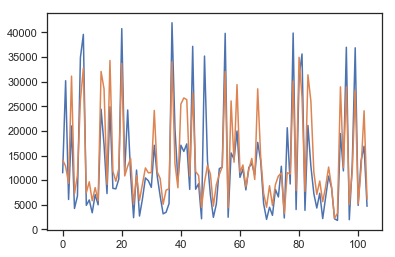

In [31]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(LinRegP) )], LinRegP)
plt.show()

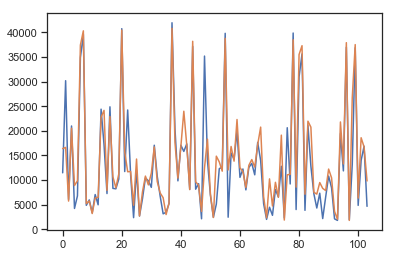

In [32]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(BagRegP) )], BagRegP)
plt.show()

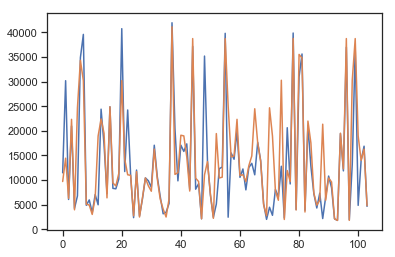

In [33]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(DecTreeP) )], DecTreeP)
plt.show()

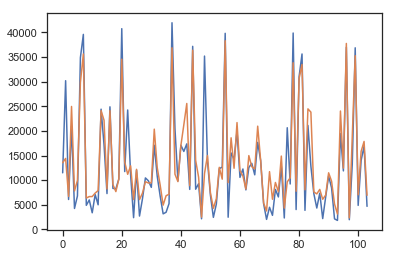

In [34]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(CatModelP) )], CatModelP)
plt.show()

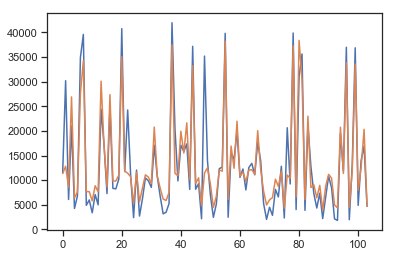

In [35]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(GmdModelP) )], GmdModelP)
plt.show()

<h3>Оценка линейной регрессии</h3>

In [36]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, LinRegP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, LinRegP))
print("Коэффициент детерминации:\t",r2_score(TestY, LinRegP))

Средняя абсолютная ошибка:	 4400.028865185846
Средняя квадратичная ошибка:	 36573012.578902915
Коэффициент детерминации:	 0.673532156737602


<h3>Оценка бэггинга</h3>

In [37]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, BagRegP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, BagRegP))
print("Коэффициент детерминации:\t",r2_score(TestY, BagRegP))

Средняя абсолютная ошибка:	 2573.302193355769
Средняя квадратичная ошибка:	 19046267.484085757
Коэффициент детерминации:	 0.8299840940279812


<h3>Оценка дерева принятия решений</h3>

In [38]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, DecTreeP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, DecTreeP))
print("Коэффициент детерминации:\t",r2_score(TestY, DecTreeP))

Средняя абсолютная ошибка:	 3421.3979010576927
Средняя квадратичная ошибка:	 45572754.89887427
Коэффициент детерминации:	 0.5931962407728004


<h3>Оценка CatBoost</h3>

In [39]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, CatModelP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, CatModelP))
print("Коэффициент детерминации:\t",r2_score(TestY, CatModelP))

Средняя абсолютная ошибка:	 2825.7439964778673
Средняя квадратичная ошибка:	 20049765.38649931
Коэффициент детерминации:	 0.8210264016526949


<h3>Оценка метода группового учета аргументов</h3>

In [40]:
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, GmdModelP))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, GmdModelP))
print("Коэффициент детерминации:\t",r2_score(TestY, GmdModelP))

Средняя абсолютная ошибка:	 2733.6972883084663
Средняя квадратичная ошибка:	 18070821.13653299
Коэффициент детерминации:	 0.8386913850835569


<h2>Подбор гиперпараметров</h2>

In [41]:
n_estimators = [1, 10, 100, 1000]
param_grid = dict(n_estimators = n_estimators)
grid = GridSearchCV(BagReg, param_grid=param_grid)
grid_result = grid.fit(TrainX, TrainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score:  0.7421078569804164
Best Params:  {'n_estimators': 1000}


In [42]:
max_depth = [i+1 for i in range(100)]
min_samples_split = [i+2 for i in range(50)]
param_grid = dict(max_depth = max_depth, min_samples_split=min_samples_split)
grid = GridSearchCV(DecTree, param_grid=param_grid)
grid_result = grid.fit(TrainX, TrainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score:  0.7589775203799848
Best Params:  {'max_depth': 2, 'min_samples_split': 3}


<h3>Проверка моделей с подобранными гиперпараметрами</h3>

In [44]:
BagReg1 = BaggingRegressor(n_estimators = 1000)
DecTree1 = DecisionTreeRegressor(max_depth = 2, min_samples_split = 3)

In [45]:
BagReg1.fit(TrainX, TrainY)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [46]:
DecTree1.fit(TrainX, TrainY)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
BagRegP1 = BagReg1.predict(TestX)
DecTreeP1 = DecTree1.predict(TestX)

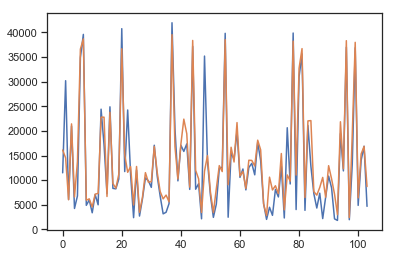

Средняя абсолютная ошибка:	 2424.5371665635475
Средняя квадратичная ошибка:	 17236266.66594265
Коэффициент детерминации:	 0.8461410092431971


In [50]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(BagRegP1) )], BagRegP1)
plt.show()
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, BagRegP1))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, BagRegP1))
print("Коэффициент детерминации:\t",r2_score(TestY, BagRegP1))

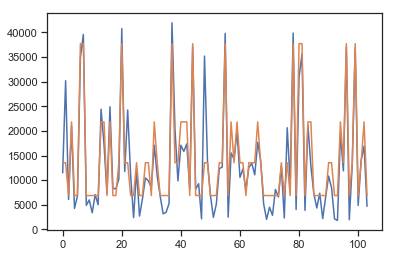

Средняя абсолютная ошибка:	 2977.2957560535287
Средняя квадратичная ошибка:	 18106423.508339114
Коэффициент детерминации:	 0.8383735816345383


In [51]:
plt.plot([i for i in range( len(TestY) )], TestY)
plt.plot([i for i in range( len(DecTreeP1) )], DecTreeP1)
plt.show()
print("Средняя абсолютная ошибка:\t",mean_absolute_error(TestY, DecTreeP1))
print("Средняя квадратичная ошибка:\t",mean_squared_error(TestY, DecTreeP1))
print("Коэффициент детерминации:\t",r2_score(TestY, DecTreeP1))